<a href="https://colab.research.google.com/github/MrCelestial/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST** is a dataset of 70,000 small
images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

**Keras** is a high-level, user-friendly API designed for human beings, not machines. It simplifies the process of building and training neural networks.

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

**MNIST Dataset** To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.



In [31]:
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(train_labels, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


# count the number of unique test labels
unique, counts = np.unique(test_labels, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


**Visualization**

There are 70,000 images, and each image has 784 features. This is because each image is 28x28 pixels, and each feature simply represents one intensity of pixels, from 0(white) to 255 (black). Let us take a peek at one digit from the dataset. All you need to do is grab feature vector of an instance, reshape it to a 28x28 array

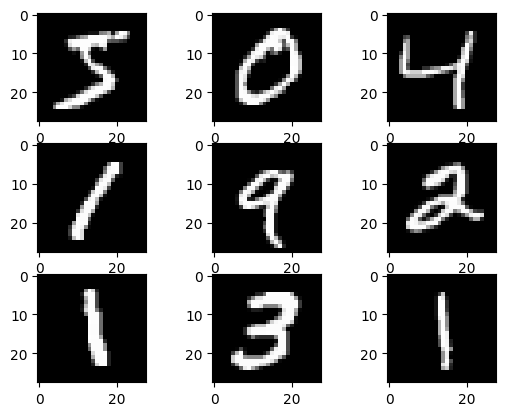

In [49]:
# sample 9 mnist digits from train dataset
train_images = train_images.reshape(train_images.shape[0], 28, 28)

for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

**One hot encoding**

At this point, the labels are in digits format, 0 to 9.

This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.

In [33]:
from keras.src.utils.np_utils import to_categorical
#the data must be in the correct shape and format.
num_labels = len(np.unique(train_labels))

#convert to one-hot vector
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


**Data processing**

In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.



In [34]:
image_size = train_images.shape[1]
input_size = image_size * image_size #image dimensions

#normalize
train_images = np.reshape(train_images, [-1, input_size])
train_images = train_images.astype('float32') / 255
test_images = np.reshape(test_images, [-1, input_size])
test_images = test_images.astype('float32') / 255

In [35]:
#network parameters
batch_size = 128
hidden = 256
dropout = 0.45

# The batch_size argument indicates the number of data
# that we will use for each update of the model parameters.

**Design**

In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer.

Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout.

256 units are chosen since 128, 512 and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.


In [36]:
model = Sequential()
#The model in Keras is considered as a sequence of layers and each of them
#gradually “distills” the input data to obtain the desired output.

model = Sequential()
model.add(Dense(hidden, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))


**Activation function**

The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings.
Some of the most used ones are under here:

---

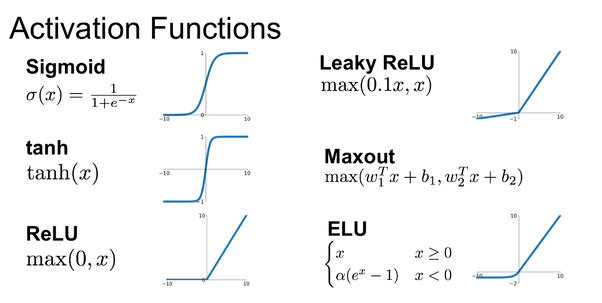

In [37]:
#Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

The total number of parameters required can be computed as follows:


1.   From input to Dense layer: 784 × 256 + 256 = 200,960.
2.  From first Dense to second Dense: 256 × 256 + 256 = 65,792.
3.From second Dense to the output layer: 10 × 256 + 10 = 2,570.
4.The total is 200,690 + 65,972 + 2,570 = 269,322.

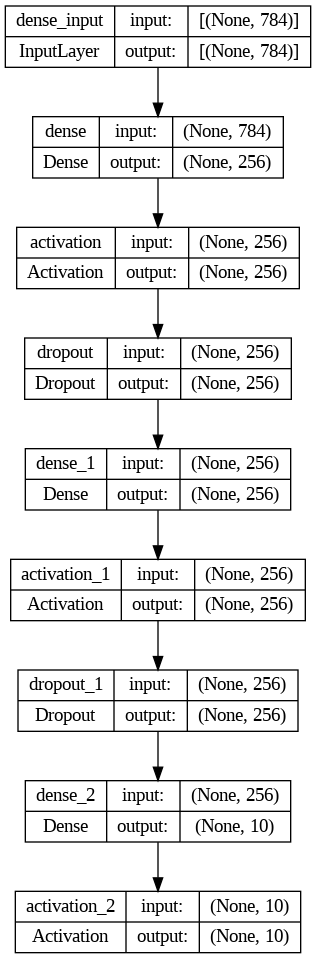

In [39]:
from keras.src.utils.vis_utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

**Compile the model with compile() method**

1. In this example, we use categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

2. Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


**Train**

In [41]:
model.fit(train_images, train_labels, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.4279 - accuracy: 0.8676
Epoch 2/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1967 - accuracy: 0.9416
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1521 - accuracy: 0.9546
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1290 - accuracy: 0.9608
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1143 - accuracy: 0.9651
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1050 - accuracy: 0.9683
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0974 - accuracy: 0.9700
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0882 - accuracy: 0.9726
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0816 - accuracy: 0.9737
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0776 - accurac

**Evaluating model performance**

In [51]:
loss, acc = model.evaluate(test_images, test_labels, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

#Overfitting and regularization
loss, acc = model.evaluate(test_images, test_labels, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 7ms/step - loss: 0.0624 - accuracy: 0.9829

Test accuracy: 98.3%
79/79 [==============================] - 1s 11ms/step - loss: 0.0624 - accuracy: 0.9829

Test accuracy: 98.3%
